<a href="https://colab.research.google.com/github/LuizGBVieira/Machine-Learning/blob/main/ProjetoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import pandas_datareader.data as web
from numpy import linalg as LA
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
!pip install tensorflow
!pip install keras

In [ ]:
lista_acoes = ['VALE3']
lista_acoes2 = ['ABEV3' , 'VALE3', 'BBAS3', 'BBSE3', 'ITSA3', 'SAPR4', 'TAEE11', 'CXSE3', 'VIVT3', 'FESA4', 'PETR4', 'CMIG3', 'GOAU4', 'KLBN4']
lista_acoes_nova = [acao + ".SA" for acao in lista_acoes]

In [ ]:
data_final = '2024-09-13'
precos_acoes = yf.download(lista_acoes_nova, start='2001-05-24', end=data_final)
precos_acoes.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-05-24,4.208333,4.333333,4.208333,4.333333,1.826999,547200
2001-05-25,4.333333,4.333333,4.291666,4.291666,1.809432,288000
2001-05-28,4.291666,4.333333,4.291666,4.325000,1.823486,5136000
2001-05-29,4.332500,4.334166,4.325000,4.333333,1.826999,849600
2001-05-30,4.333333,4.333333,4.333333,4.333333,1.826999,0


In [ ]:
cotacao = precos_acoes['Close'].to_numpy().reshape(-1, 1)
cotacao

array([[ 4.33333302],
       [ 4.29166603],
       [ 4.32499981],
       ...,
       [56.        ],
       [57.59000015],
       [58.11000061]])

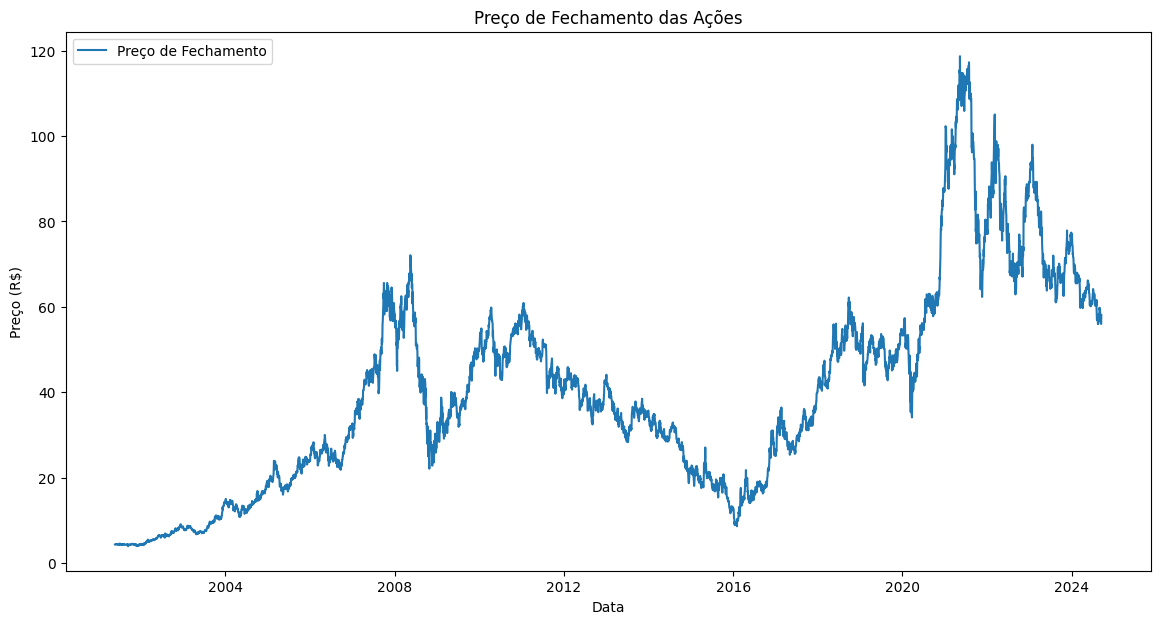

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(precos_acoes['Close'], label='Preço de Fechamento')
plt.title('Preço de Fechamento das Ações')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.show()

In [ ]:
tamanho_dados_treinamento = int(len(cotacao) * 0.8)
tamanho_dados_treinamento

4672

In [ ]:
escalador = MinMaxScaler(feature_range=(0, 1))

dados_normalizados_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])

dados_normalizados_teste = escalador.transform(cotacao[tamanho_dados_treinamento: , :])

dados_normalizados = list(dados_normalizados_treinamento.reshape(
    len(dados_normalizados_treinamento))) + list(dados_normalizados_teste.reshape(len(dados_normalizados_teste)))

dados_normalizados = np.array(dados_normalizados).reshape(len(dados_normalizados), 1)
dados_normalizados

array([[0.00599036],
       [0.0053791 ],
       [0.00586811],
       ...,
       [0.76395515],
       [0.78728091],
       [0.79490946]])

In [ ]:
dados_para_treinamento = dados_normalizados[0: tamanho_dados_treinamento, :]

treinamento_x = []
treinamento_y = []

for i in range(60, len(dados_para_treinamento)):
    treinamento_x.append(dados_para_treinamento[i-60:i, 0])
    treinamento_y.append(dados_para_treinamento[i, 0])
    if i <= 61:
        print(treinamento_x)
        print(treinamento_y)

[array([0.00599036, 0.0053791 , 0.00586811, 0.00599036, 0.00599036,
       0.00568474, 0.00599036, 0.00599036, 0.00721288, 0.00782415,
       0.00721288, 0.00721288, 0.00721288, 0.00721288, 0.00806866,
       0.00806866, 0.00721288, 0.0053791 , 0.00476784, 0.00476784,
       0.00464558, 0.0064916 , 0.00525685, 0.00470671, 0.00474339,
       0.00415658, 0.00721288, 0.00867991, 0.00501234, 0.00501234,
       0.00721288, 0.00841096, 0.00841096, 0.00843542, 0.00721288,
       0.00721288, 0.00599036, 0.00501234, 0.00476784, 0.00476784,
       0.00427883, 0.0053791 , 0.00647936, 0.00452334, 0.00660163,
       0.00660163, 0.00623487, 0.0053791 , 0.00696839, 0.00599036,
       0.00599036, 0.00623487, 0.00623487, 0.00599036, 0.00623487,
       0.00599036, 0.00721288, 0.00660163, 0.00721288, 0.00672388])]
[0.0059536863115133565]
[array([0.00599036, 0.0053791 , 0.00586811, 0.00599036, 0.00599036,
       0.00568474, 0.00599036, 0.00599036, 0.00721288, 0.00782415,
       0.00721288, 0.00721288, 0.0

In [ ]:
treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)

treinamento_x

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

treinamento_x

array([[[0.00599036],
        [0.0053791 ],
        [0.00586811],
        ...,
        [0.00660163],
        [0.00721288],
        [0.00672388]],

       [[0.0053791 ],
        [0.00586811],
        [0.00599036],
        ...,
        [0.00721288],
        [0.00672388],
        [0.00595369]],

       [[0.00586811],
        [0.00599036],
        [0.00599036],
        ...,
        [0.00672388],
        [0.00595369],
        [0.00599036]],

       ...,

       [[0.64233846],
        [0.60404901],
        [0.60903691],
        ...,
        [0.74312337],
        [0.74620412],
        [0.72874644]],

       [[0.60404901],
        [0.60903691],
        [0.62590776],
        ...,
        [0.74620412],
        [0.72874644],
        [0.72434537]],

       [[0.60903691],
        [0.62590776],
        [0.61783911],
        ...,
        [0.72874644],
        [0.72434537],
        [0.7394558 ]]])

In [ ]:
robo = Sequential()

robo.add(LSTM(50, return_sequences=True, input_shape=(treinamento_x.shape[1], 1)))
robo.add(LSTM(50, return_sequences=False))
robo.add(Dense(25))
robo.add(Dense(1))
treinamento_x.shape[1]
robo.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
robo.fit(treinamento_x, treinamento_y, batch_size=2, epochs=10)

Epoch 1/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 108s 45ms/step - loss: 3.6350e-04
Epoch 2/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 144s 47ms/step - loss: 3.6174e-04
Epoch 3/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - loss: 2.7277e-04
Epoch 4/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 140s 46ms/step - loss: 2.8768e-04
Epoch 5/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 143s 47ms/step - loss: 2.6329e-04
Epoch 6/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 107s 46ms/step - loss: 2.1758e-04
Epoch 7/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 142s 46ms/step - loss: 2.4334e-04
Epoch 8/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 143s 47ms/step - loss: 2.3382e-04
Epoch 9/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 107s 46ms/step - loss: 2.6326e-04
Epoch 10/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 141s 46ms/step - loss: 2.1672e-04


In [ ]:
dados_teste = dados_normalizados[tamanho_dados_treinamento - 60: , :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento: , :]

for i in range(60, len(dados_teste)):
    teste_x.append(dados_teste[i-60:i, 0])

In [ ]:
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [ ]:
predicoes = robo.predict(teste_x)
predicoes = escalador.inverse_transform(predicoes)
predicoes

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


array([[53.945488],
       [53.663593],
       [54.05915 ],
       ...,
       [56.634247],
       [55.95356 ],
       [57.55128 ]], dtype=float32)

In [ ]:
rmse = np.sqrt(np.mean(predicoes - teste_y)**2)
rmse

2.227805458245061

In [ ]:
treinamento = precos_acoes.iloc[:tamanho_dados_treinamento, :]
df_teste = pd.DataFrame({"Close":precos_acoes['Close'].iloc[tamanho_dados_treinamento:],
                         "predicoes": predicoes.reshape(len(predicoes))})

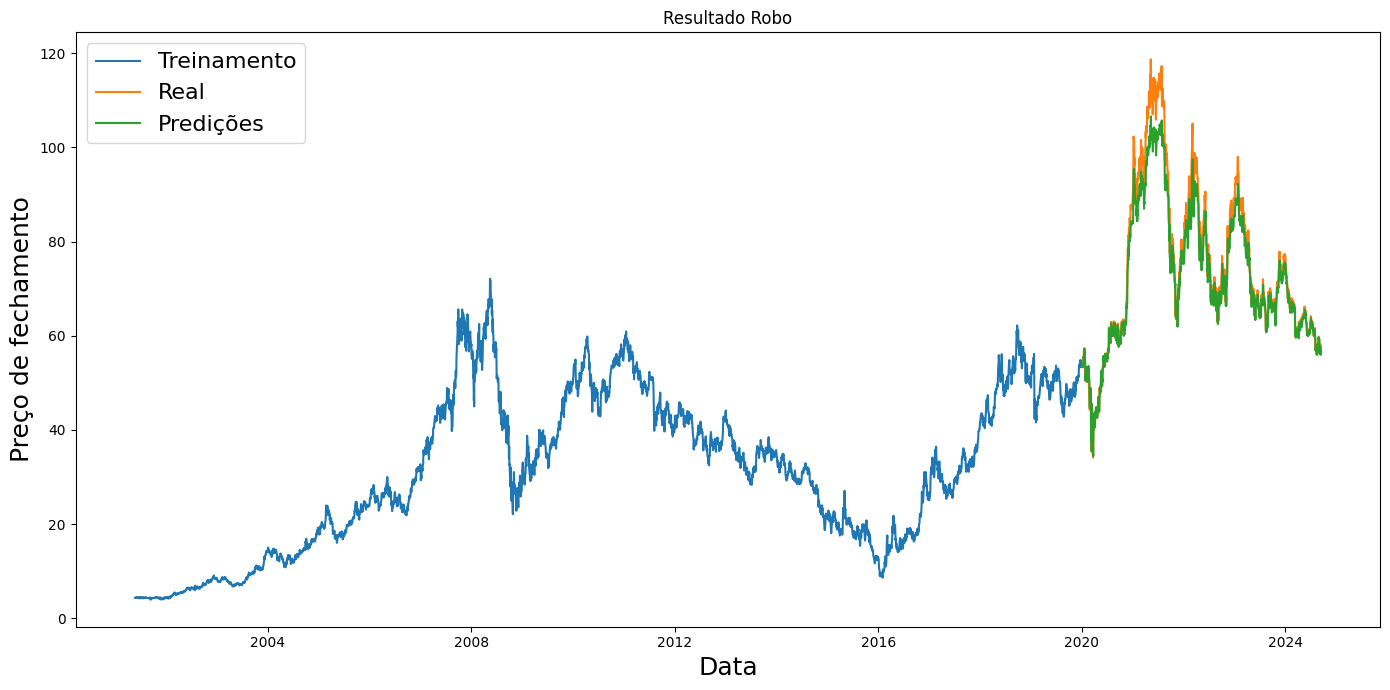

In [ ]:
plt.figure(figsize=(14, 7))
plt.title('Resultado Robo')
plt.plot(treinamento['Close'])
plt.plot(df_teste[['Close', 'predicoes']])
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Preço de fechamento' , fontsize = 18)
plt.legend(['Treinamento' , 'Real', 'Predições'], loc=2, prop={'size' : 16})
plt.tight_layout()
plt.show()

In [ ]:
df_teste.sort_index()
df_teste

,Close,predicoes
Date,,
2020-01-06,53.610001,53.945488
2020-01-07,54.000000,53.663593
2020-01-08,54.009998,54.059151
2020-01-09,53.299999,54.048229
2020-01-10,53.360001,53.344479
...,...,...
2024-09-06,56.680000,57.299091
2024-09-09,56.680000,56.600361
2024-09-10,56.000000,56.634247
